In [3]:
import pandas as pd
from typing import *
import os
import sqlite3
import matplotlib.pyplot as plt
from datetime import datetime

# go through all repos, look for "commit_histories"
data_root = "/Users/antonsquared/Google_Drive/PLSC_355/github-scraper/data"
data_conn = sqlite3.connect(os.path.join(data_root, "github_scraper_db.sqlite3"))





def find_file(search_token, root, search_function):
    for root, dirs, files in os.walk(root):
        for name in files:
            # print(os.path.join(root, name))
            if search_function(search_token, name):
                return os.path.join(root, name)
    return None


def graph_repo_commit_data(
        df: pd.DataFrame,
        start_date: datetime = None,
        end_date: datetime = None, 
):
    df.loc[:, "commit_date"] = df["commit_date"].astype(str)
    print(len(df), df.dtypes)
    print(df.head(10))
    df.loc[:, "commit_date_parsed"]= df["commit_date"].apply(pd.to_datetime, format='%Y-%m-%dT%H:%M:%SZ')
    # df.loc[:, "commit_date"] = pd.to_datetime(df.loc[:, "commit_date"], format="ISO8601")
    print(len(df), df.dtypes)
    plot = df.groupby(df["commit_date_parsed"].dt.date).count().plot(kind="bar")


def collect_repo_commit_histories(
        entities: List[str] = [],
        orgs: List[str] = [],
        repos: List[str] = [],
        members: List[str] = [],
        callbacks: callable = None,
        *args,
        **kwargs

):
    entities = entities
    orgs = orgs
    repos = repos
    members = members
    # go through all subdirectories
    if entities:
        for entity in entities:
            entity_file = find_file("{entity}_organizations.csv", data_root, lambda x,y: x in y)
            if entity_file:
                entity_df = pd.read_csv(entity_file)
                orgs.extend(entity_df["github_org_name"].tolist())
                collect_repo_commit_histories(orgs=orgs)
            else:
                print(f"No file found for {entity}")
                
    if orgs:
        commit_df = pd.DataFrame()
        def matcher(x, y):
            return y.startswith(x) and "commit_history" in y
        repo_commit_list = []
        for org in orgs:
            org_file = find_file(org, data_root, matcher)
            if org_file:
                repo_commit_list.append(pd.read_csv(org_file))
            else:
                print(f"No file found for {org}")
        
        commit_df = pd.concat(repo_commit_list)


    elif repos:
        pass
    elif members:
        pass

    callbacks[0](commit_df, **kwargs)




    

    
    

/Users/antonsquared/Google_Drive/PLSC_355/github-scraper/data/github_scraper_db.sqlite3
/Users/antonsquared/Google_Drive/PLSC_355/github-scraper/data/example_output.csv
/Users/antonsquared/Google_Drive/PLSC_355/github-scraper/data/test.db
/Users/antonsquared/Google_Drive/PLSC_355/github-scraper/data/2023-04-18_00-57-26/contributor_list.csv
/Users/antonsquared/Google_Drive/PLSC_355/github-scraper/data/2023-04-18_00-57-26/org_repositories.csv
/Users/antonsquared/Google_Drive/PLSC_355/github-scraper/data/2023-04-18_00-57-26/contributor_network.gexf
/Users/antonsquared/Google_Drive/PLSC_355/github-scraper/data/2023-04-18_00-57-11/contributor_list.csv
/Users/antonsquared/Google_Drive/PLSC_355/github-scraper/data/2023-04-18_00-57-11/org_repositories.csv
/Users/antonsquared/Google_Drive/PLSC_355/github-scraper/data/2023-04-18_00-57-11/contributor_network.gexf
/Users/antonsquared/Google_Drive/PLSC_355/github-scraper/data/2023-04-24_03-58-25/kuaishou_organizations.csv
/Users/antonsquared/Google

NameError: name 'plo' is not defined

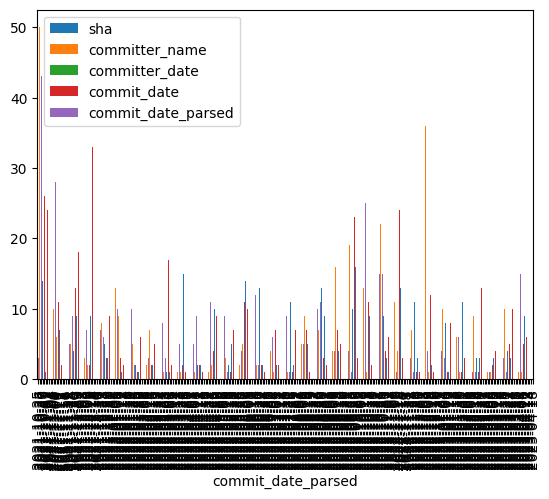

In [4]:

collect_repo_commit_histories(orgs=["DouyinFE"], callbacks=[graph_repo_commit_data])
